In [1]:
!pip install pdfminer.six

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 24.2 MB/s eta 0:00:00


In [2]:
!pip3 install PyMuPDF

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.6/30.6 MB 41.8 MB/s eta 0:00:00


In [3]:
!pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 27.1 MB/s eta 0:00:00


In [4]:
from pdfminer.pdfpage import PDFPage
def is_pdf_image(fname):
    searchable_pages = [] # создадим два листа для хранения индексов читаемых
    non_searchable_pages = [] # и нечитаемых страниц
    page_num = 0
    with open(fname, 'rb') as infile:
        for page in PDFPage.get_pages(infile):
            page_num += 1
            if 'Font' in page.resources.keys(): # только читаемые страницы имеют атрибут ‘Font’
                searchable_pages.append(page_num)
            else:
                non_searchable_pages.append(page_num)
    if page_num > 0:
        if len(searchable_pages) == 0:
            return 'image'
        elif len(non_searchable_pages) == 0:
            return 'text'
        else:
            return 'mix' # при необходимости можно вернуть индексы страниц для обработки
    else:
        return('Not a valid document')

In [5]:
is_pdf_image("demo.pdf")

'text'

In [6]:
from io import StringIO
from pdfminer.high_level import PDFResourceManager, TextConverter, PDFPageInterpreter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage

path = "./demo.pdf"  # Replace with the actual path to your PDF file

rsrcmgr = PDFResourceManager()
retstr = StringIO()
laparams = LAParams()
device = TextConverter(rsrcmgr, retstr, laparams=laparams)  # Create service objects
fp = open(path, 'rb')
interpreter = PDFPageInterpreter(rsrcmgr, device)  # Create service objects
caching = True
pagenos = set()
for page in PDFPage.get_pages(fp, pagenos, caching=caching, check_extractable=True):
    interpreter.process_page(page)  # Page-wise processing

text = retstr.getvalue()
text = text.replace('\n', ' ')  # Optional: Remove control characters
fp.close()
device.close()
retstr.close()


In [7]:
text

"Nestled among the craggy peaks, the moon casts its ethereal glow upon the mountainous  landscape. Majestic and serene, the moonlight bathes the rugged slopes, revealing nature's  timeless masterpiece. Silhouetted against the night sky, the mountains stand as silent sentinels,  their jagged peaks reaching for the celestial orb. A celestial dance unfolds, painting a tranquil  tableau under the silent gaze of the moon, turning the mountains into a nocturnal poetry  etched against the canvas of the cosmos.   Watches, more than mere timekeepers, embody the fusion of precision and craftsmanship.  Strapped to wrists, they transcend utility, becoming timeless statements of style. Each tick  echoes meticulous engineering, while the hands move gracefully, measuring moments in a  dance with time. From classic elegance to modern innovation, watches are not just accessories;  they are symbols of personal narratives. In their intricate mechanisms, horological artistry meets  functionality. Whether 

In [8]:
from pdfminer.high_level import PDFResourceManager, TextConverter, PDFPageInterpreter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage
from io import StringIO



if is_pdf_image(path) == 'text':
    rsrcmgr = PDFResourceManager()
    retstr = StringIO()
    laparams = LAParams()
    device = TextConverter(rsrcmgr, retstr, laparams=laparams)

    with open(path, 'rb') as fp:
        interpreter = PDFPageInterpreter(rsrcmgr, device)
        for page in PDFPage.get_pages(fp):
            interpreter.process_page(page)

    text = retstr.getvalue()
    text = text.replace('\n', ' ')  # Optional: Remove control characters

    print(text)

    device.close()
    retstr.close()
else:
    print("Not a text PDF.")


Nestled among the craggy peaks, the moon casts its ethereal glow upon the mountainous  landscape. Majestic and serene, the moonlight bathes the rugged slopes, revealing nature's  timeless masterpiece. Silhouetted against the night sky, the mountains stand as silent sentinels,  their jagged peaks reaching for the celestial orb. A celestial dance unfolds, painting a tranquil  tableau under the silent gaze of the moon, turning the mountains into a nocturnal poetry  etched against the canvas of the cosmos.   Watches, more than mere timekeepers, embody the fusion of precision and craftsmanship.  Strapped to wrists, they transcend utility, becoming timeless statements of style. Each tick  echoes meticulous engineering, while the hands move gracefully, measuring moments in a  dance with time. From classic elegance to modern innovation, watches are not just accessories;  they are symbols of personal narratives. In their intricate mechanisms, horological artistry meets  functionality. Whether t

In [9]:
import fitz
foc = fitz.open(path)
foc

Document('./demo.pdf')

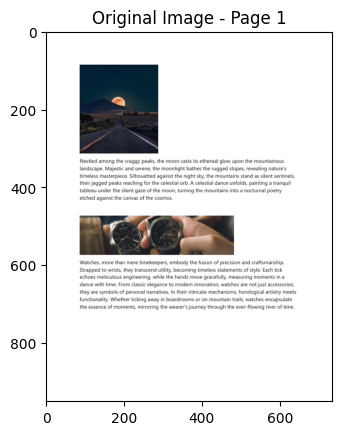

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

path = "demo.pdf"  # Replace with the actual path to your PDF file

if is_pdf_image(path) == 'text':
    doc = fitz.open(path)

    for page_num in range(doc.page_count):
        page = doc[page_num]
        pix = page.get_pixmap()

        # Convert the pixmap to a NumPy array
        img = np.frombuffer(pix.samples, dtype=np.uint8).reshape((pix.height, pix.width, 3))
        # Convert from RGB to BGR
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        # Preprocess the image if needed
        img = cv2.resize(img, None, fx=1.2, fy=1.2, interpolation=cv2.INTER_CUBIC)
        # Display the original image
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(f"Original Image - Page {page_num + 1}")
        plt.show()


        # Further processing steps for image extraction go here

    doc.close()
else:
    print("Not an image PDF.")


In [33]:
img[:1]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)

In [34]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Apply dilation and erosion
kernel = np.ones((1, 1), np.uint8)
img = cv2.dilate(gray_img, kernel, iterations=1)
img = cv2.erode(img, kernel, iterations=1)

In [35]:
result1=cv2.threshold(cv2.bilateralFilter(img, 5, 75, 75), 0, 255,
              cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

result2=cv2.threshold(cv2.medianBlur(img, 3), 0, 255,
              cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

result3=cv2.adaptiveThreshold(cv2.bilateralFilter(img, 9, 75, 75),
                      255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 31, 2)

result4=cv2.adaptiveThreshold(cv2.medianBlur(img, 3), 255,
                      cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 31, 2)

In [16]:
import easyocr

reader = easyocr.Reader(['ru', 'en'])
result = reader.readtext(result1)


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.1% Complete

In [24]:
result = reader.readtext(img)

In [25]:
temp_str = ""
for j, res in enumerate(result):
      bboxes = res[0]
      text = res[1]
      score = res[2]
      temp_str += ' ' + text

In [26]:
temp_str

' Nestled among the craggy peaks; ihe moon casts its ethereal glow upon the mountainous landscape: Majestic and serene the moorlight bathes the rugged slopes revealing nature s timeless masterpiece: Silhouetted against the nighi sky; the mountains stand as silent sentinels their jagged peaks reaching for the celestial orb: celestial dance unfolds painting tranquil tableau under the silent gaze of the moon  turning the mountains into nocturnal poetry etched against the canvas of the cosmos: Watcnes; more Ihan mere timekeepers embody ihe fusion of precision and craftsmanship: Strapped to wrists; ihey transcend utility; becoming timeless statements of style  Each tick echoes meticulous engineering; "hile the hands move gracefully; measuring moments in a dance with time; From classic elegance 1o modemn innovation; watches are not ) accessories; they are symbols of personal narratives In their intricate mechanisms; horological artistry meets functianality  Whether ticking away in boardrooms

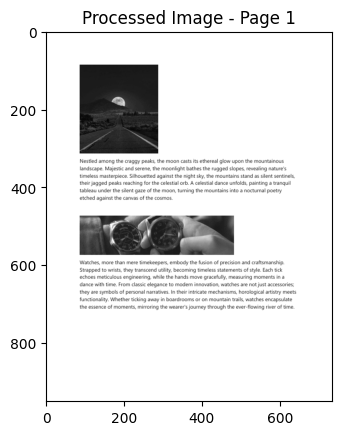

In [42]:
# Display the processed image
plt.imshow(img, cmap='gray')
plt.title(f"Processed Image - Page {page_num + 1}")
plt.show()

In [41]:
result = reader.readtext(result4)
temp_str = ""
for j, res in enumerate(result):
      bboxes = res[0]
      text = res[1]
      score = res[2]
      temp_str += ' ' + text
temp_str

' #иWd ито40 Ви aтl pЦц tя moon ait l #иWн oow uon Ви полоон [dю ннх Md чи Ua поолуx Ыaz .o #fа wр4 mиwtng ошt Шяним пинрио $олпт суа €и ₽ум цу а4 #ои Щмd 4 и и44 Циi Муула о мхыъош #Wш o ^ ашнпи амх щющ р ю шан uonwwам ,9 Шии1 о &т #ид &ъ mониц \'о naxam  powr RJwd чмля [ аmз Qt ФИo3 ммаи mож dun пънт Уыkнт #иросу {а Шlion 6 ptalo и1 омшин\'а Sueppid ю ~ъ4 Ihy кеwою biat9 Imh ниим# &ну4 UKh &t ~dюм мшащ молwитп9 #hъ Цю Кh1t #ки" &юuгу; пнияh9 чтытин 4 ₽ аwкь wt &т Konaui #тv ю moom #мюд Фхсhя ~nАm кгилотд duy wY Smbok 0 |шan пnbx h Виz bлkа пилщалц hnb\'al vttу пa #икошну илит !dug ту 4 bxфboma 0 Cn mомаыю 6rt wиам ~ощдо Еичлмо 0 mомиц Qal tu wыех}иму |оJyn mа wк ul # dш tnho иму'

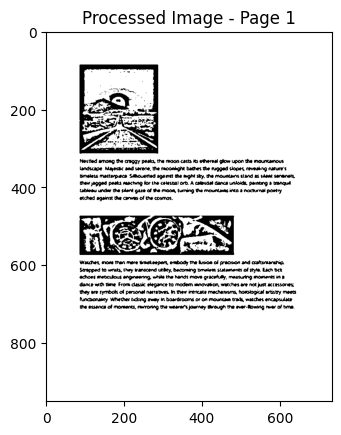

In [23]:
 # Display the processed image
plt.imshow(result4, cmap='gray')
plt.title(f"Processed Image - Page {page_num + 1}")
plt.show()